# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)
conn = engine.connect()

In [5]:
Base = automap_base()

In [6]:
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['emoji']

In [8]:
emoji=Base.classes.emoji

In [9]:
session = Session(engine)

## Explore Database

In [10]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector = inspect(engine)

inspector.get_table_names()

['emoji']

In [11]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns=inspector.get_columns('emoji')

for column in columns:
    print(column['name'], column['type'])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [12]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
#ten_rows = session.query(emoji).first()

for row in session.query(emoji.id, emoji.emoji_char, emoji.emoji_id, emoji.name, emoji.score).limit(10).all():
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [13]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [14]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [15]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE

results=session.query(emoji.emoji_char, emoji.emoji_id, emoji.score).all()

print(results)


    
    
    


[('😂', '1F602', 1814832150), ('❤️', '2764', 840619939), ('😍', '1F60D', 680382416), ('♥️', '2665', 652715459), ('😭', '1F62D', 515991922), ('😊', '1F60A', 484540701), ('♻️', '267B', 452489849), ('😒', '1F612', 441690175), ('💕', '1F495', 381679908), ('😘', '1F618', 377847645), ('😩', '1F629', 343967555), ('☺️', '263A', 333263710), ('👌', '1F44C', 311468371), ('😔', '1F614', 283873968), ('😏', '1F60F', 275930731), ('😁', '1F601', 268504794), ('⬅️', '2B05', 225109999), ('😉', '1F609', 210995480), ('👍', '1F44D', 186214004), ('😌', '1F60C', 180720579), ('🙏', '1F64F', 175057316), ('🎶', '1F3B6', 170127733), ('😢', '1F622', 166417040), ('😎', '1F60E', 160872106), ('😅', '1F605', 160434523), ('👀', '1F440', 159984970), ('😳', '1F633', 156664610), ('🙌', '1F64C', 154175844), ('💔', '1F494', 152572644), ('🙈', '1F648', 148162690), ('✌️', '270C', 143975239), ('✨', '2728', 139984564), ('💙', '1F499', 139339131), ('💜', '1F49C', 137264417), ('💯', '1F4AF', 134780880), ('😴', '1F634', 130865258), ('😄', '1F604', 130477038), 

Unpack tuples using list comprehensions

In [16]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE

emoji_df = pd.DataFrame(results, columns = ['Emoji Character', 'Emoji ID', 'Score'])

emoji_id_list=emoji_df['Emoji ID'].values.tolist()
score_list=emoji_df['Score'].values.tolist()                       
print(score_list)


[1814832150, 840619939, 680382416, 652715459, 515991922, 484540701, 452489849, 441690175, 381679908, 377847645, 343967555, 333263710, 311468371, 283873968, 275930731, 268504794, 225109999, 210995480, 186214004, 180720579, 175057316, 170127733, 166417040, 160872106, 160434523, 159984970, 156664610, 154175844, 152572644, 148162690, 143975239, 139984564, 139339131, 137264417, 134780880, 130865258, 130477038, 130424962, 128234168, 117379741, 116339825, 114838048, 112633851, 108324223, 106264072, 102799918, 101184223, 100755958, 100292305, 100157815, 98235735, 89030704, 87426008, 87163250, 86580161, 85658369, 85312719, 82829646, 79126643, 78680533, 77765674, 74343725, 73032826, 72768872, 70983935, 70255616, 69816777, 69065216, 68397410, 67612477, 67066945, 65760360, 65256066, 63920738, 60958875, 59951054, 59648875, 59562452, 59391321, 59228054, 56117603, 55226491, 53880740, 52440798, 52172894, 51288550, 50359440, 50124691, 50014772, 48711658, 46436502, 46214249, 44572629, 41026341, 40343477

## Plot using Matplotlib

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

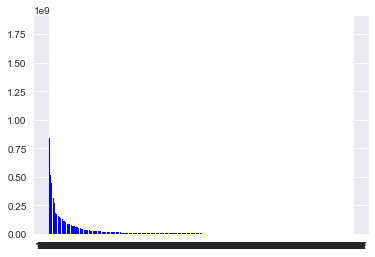

In [18]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
plt.bar(emoji_id_list, score_list, color='b', align='center')
plt.title


## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [19]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df.head(10)

NameError: name 'df' is not defined

Plot using Pandas

In [ ]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE

In [20]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
emoji_data = pd.read_sql_query("SELECT emoji_id, score FROM emoji", conn, index_col='emoji_id')

emoji_data.sort_values("score", ascending=False)

emoji_data[:10]



# YOUR CODE HERE

,score
emoji_id,
1F602,1814832150
2764,840619939
1F60D,680382416
2665,652715459
1F62D,515991922
1F60A,484540701
267B,452489849
1F612,441690175
1F495,381679908


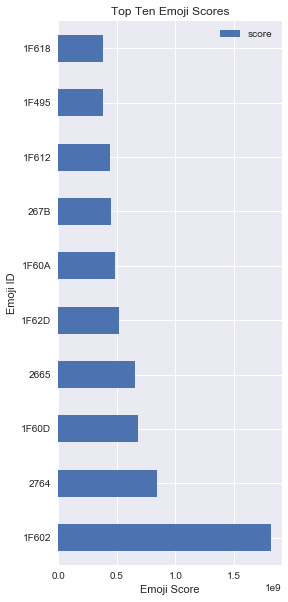

<Figure size 432x288 with 0 Axes>

In [21]:
emoji_data[:10].plot(kind='barh', figsize=(4,10))

plt.title('Top Ten Emoji Scores')
plt.ylabel('Emoji ID')
plt.xlabel('Emoji Score')

plt.show()
plt.tight_layout()